In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

print(f"Pandas Version :- {pd.__version__}")
print(f"Numpy Version :- {np.__version__}")
print(f"Matplotlib Version :- {matplotlib.__version__}")
print(f"Seaborn Version :- {sns.__version__}")

Pandas Version :- 1.5.1
Numpy Version :- 1.23.4
Matplotlib Version :- 3.6.2
Seaborn Version :- 0.12.1


In [3]:
df_train = pd.read_csv('data/train.csv', parse_dates=['date'])

df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
# Checking if date column has been parsed correctly or not.
df_train['date'].dtype

dtype('<M8[ns]')

In [5]:
df_train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [6]:
df_train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [7]:
df_train['date'].is_monotonic_increasing

# This shows that the date column is already sorted in ascending order

True

## Plotting Time - Series Data

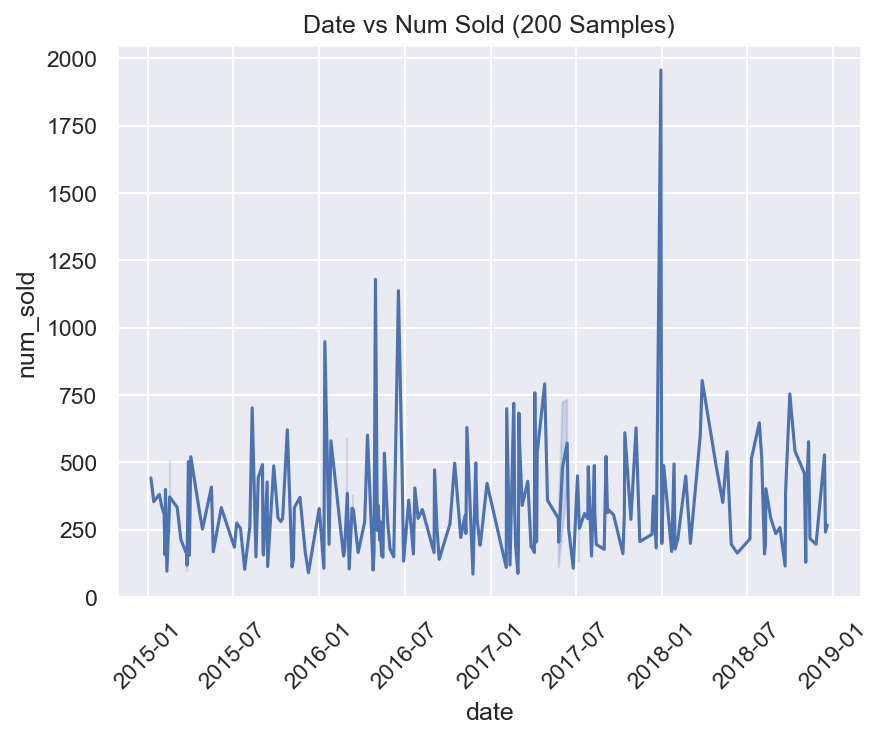

In [8]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='date', y='num_sold', data=df_train.sample(n=200, random_state=38))
plt.xticks(rotation=45)
plt.title('Date vs Num Sold (200 Samples)')
plt.show()

<AxesSubplot: title={'center': 'Quaterly Sales'}, xlabel='Date', ylabel='Num Sold'>

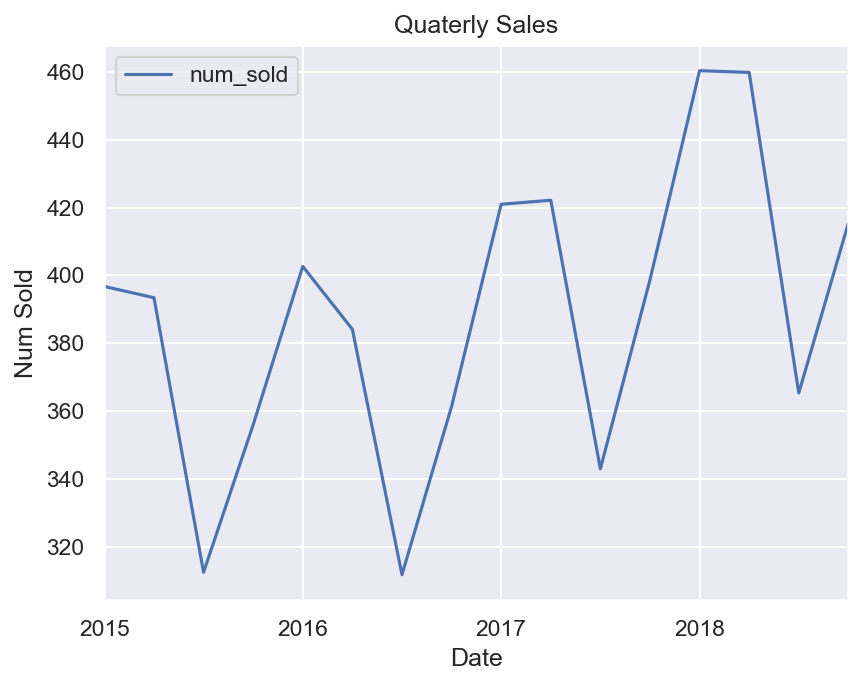

In [9]:
test = pd.read_csv('data/train.csv', parse_dates=True, index_col='date')

test['num_sold'].resample('Q').mean().plot(kind='line', title='Quaterly Sales', legend=True, xlabel='Date', ylabel='Num Sold', grid=True)

## Visualising Different Features of the DataSet

In [10]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [11]:
df_train['store'].value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

### Plotting Which Store Sold How Many Products 

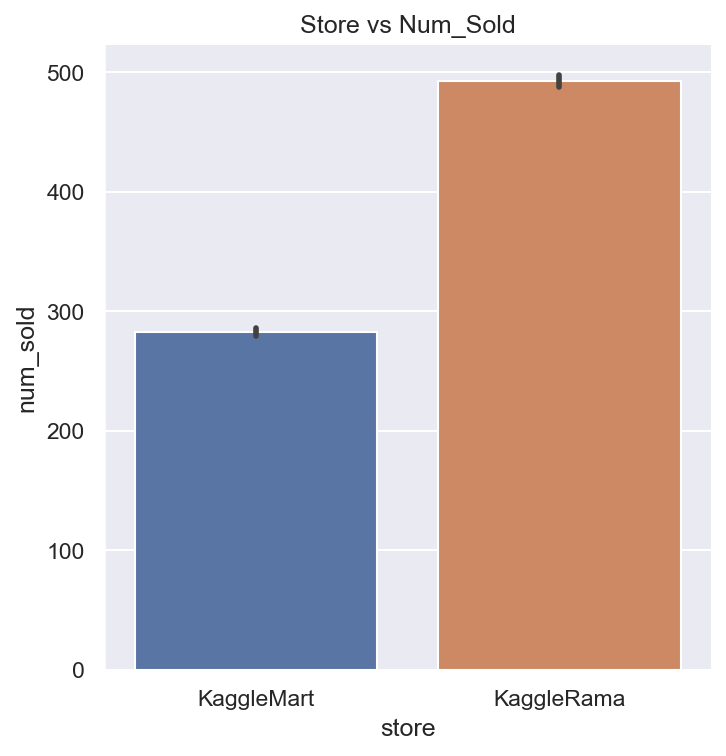

In [12]:
ax = sns.catplot(data=df_train, x='store', y='num_sold', kind='bar', margin_titles=True)
plt.title("Store vs Num_Sold")
plt.show()

### Plotting Which Store Sold Which Product and How Many of Them

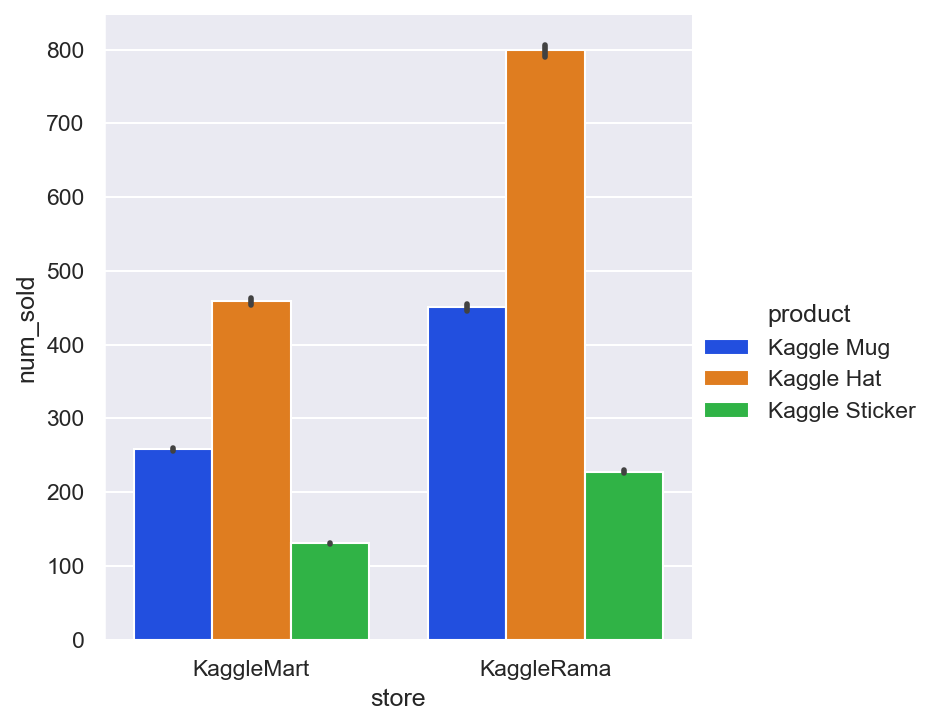

In [13]:
sns.catplot(data=df_train, x='store', y='num_sold', hue='product', kind='bar', palette='bright')

### Plotting The Overall Shape / Distribution of the `num_sold` feature

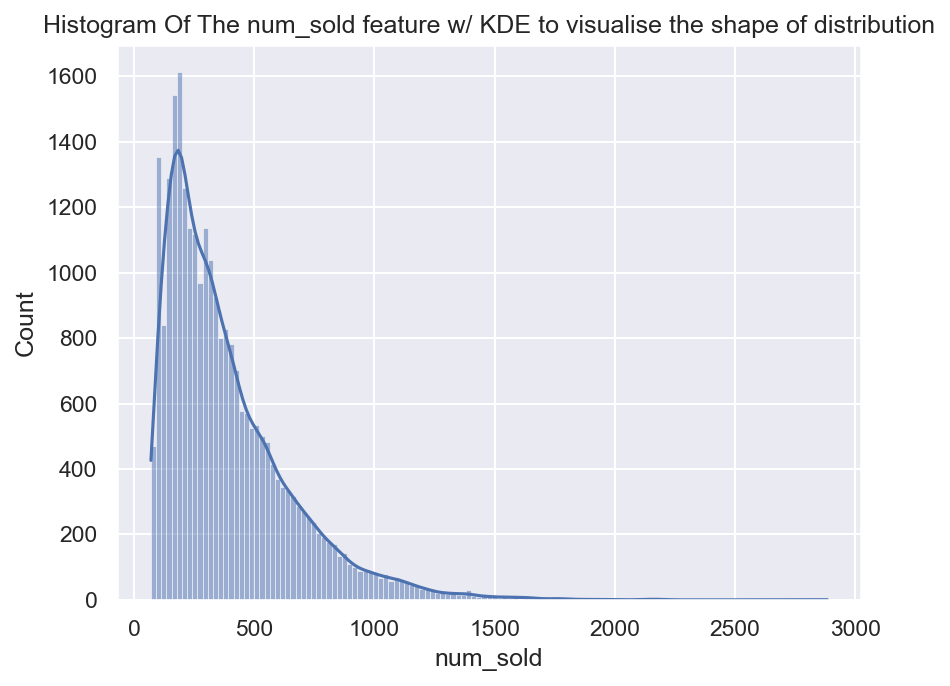

In [14]:
sns.histplot(data=df_train, x='num_sold', kde=True)
plt.title('Histogram Of The num_sold feature w/ KDE to visualise the shape of distribution')
plt.show()

## Detecting Outliers

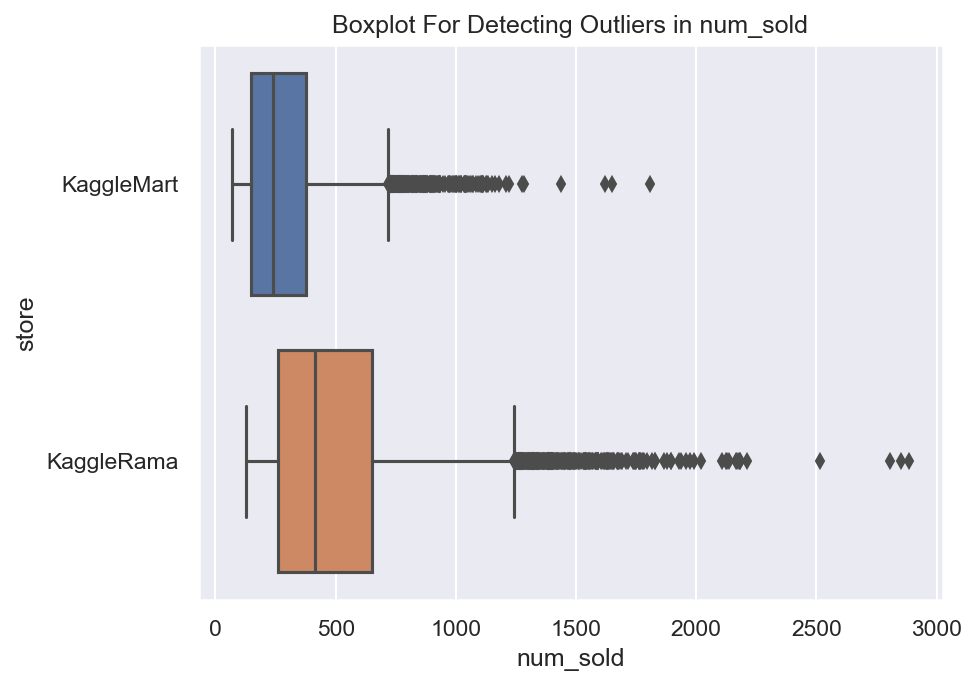

In [15]:
sns.boxplot(data=df_train, x='num_sold', y='store') 
plt.title('Boxplot For Detecting Outliers in num_sold')
plt.show()

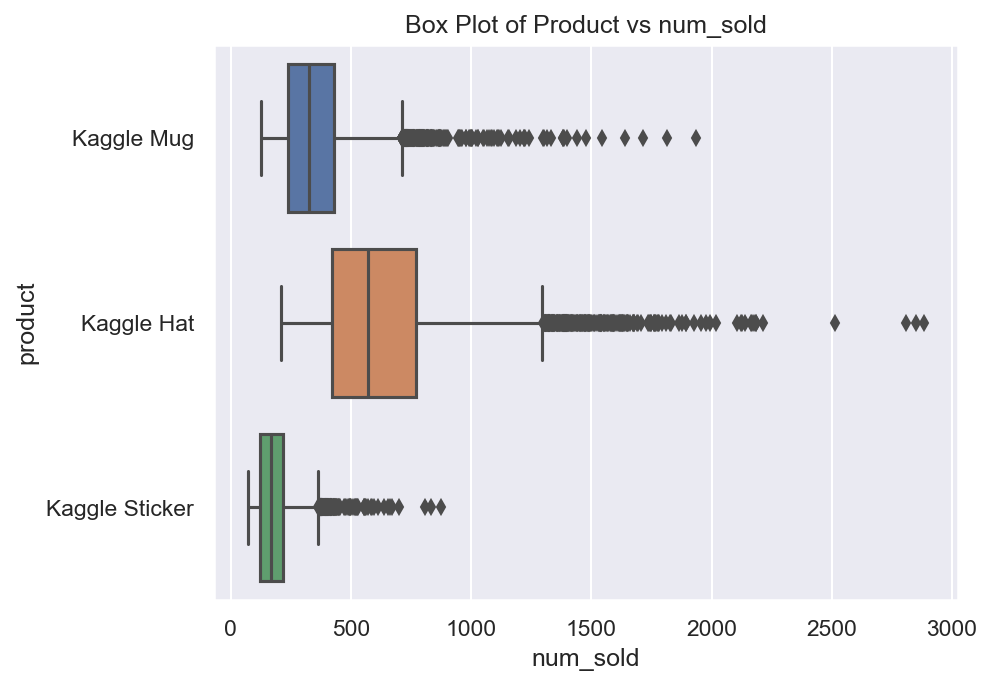

In [16]:
sns.boxplot(data=df_train, x='num_sold', y='product')
plt.title('Box Plot of Product vs num_sold')
plt.show()

- After seeing both the above box plots, we can confirm that there are a lot of outliers in the `num_sold` feature.
- Outliers basically means that the particular value falls outside of the 75th percentile range.
- We can confirm that by the following code.

In [17]:
# Defining the quartiles :- 

q1 = df_train['num_sold'].quantile(0.25)
q3 = df_train['num_sold'].quantile(0.75)

IQR = q3 - q1

print(f"25th Quartile :- {q1}")
print(f"75th Quartile :- {q3}")
print(f"IQR (75th Quartile - 25th Quartile) :- {IQR}")

25th Quartile :- 190.0
75th Quartile :- 510.0
IQR (75th Quartile - 25th Quartile) :- 320.0


In [18]:
# Defining the bounds
whisker_width = 1.5
upper_bound = q3 + whisker_width * IQR
lower_bound = q1 - whisker_width * IQR

print(f"Lower Bound :- {lower_bound}")
print(f"Upper Bound :- {upper_bound}")

Lower Bound :- -290.0
Upper Bound :- 990.0


In [19]:
num_sold_outliers = df_train[(df_train['num_sold'] < lower_bound) | (df_train['num_sold'] > upper_bound)]

total_outliers = len(num_sold_outliers)
total_rows = len(df_train)
percentage_outliers = total_outliers / total_rows * 100

print(f"Total Outliers :- {total_outliers}")
print(f"Total Rows :- {total_rows}")
print(f"Percentage Of Outliers in num_sold :- {percentage_outliers :.2f}%")

Total Outliers :- 970
Total Rows :- 26298
Percentage Of Outliers in num_sold :- 3.69%


In [20]:
# We can see that 3% of the total num_sold rows have outliers
# We can also confirm that by describing the dataframe

max_val_num_sold = df_train['num_sold'].max()
min_val_num_sold = df_train['num_sold'].min()
median_num_sold = df_train['num_sold'].median()
mean_num_sold = df_train['num_sold'].mean()
std_dev_num_sold = df_train['num_sold'].std()

print(f"Maximum Value in Column :- {max_val_num_sold}")
print(f"Minimum Value in Column :- {min_val_num_sold}")
print(f"Median Value in Column :- {median_num_sold}")
print(f"Mean Value in Column :- {mean_num_sold :.2f}")
print(f"Standard Deviation in Column :- {std_dev_num_sold :.2f}")

Maximum Value in Column :- 2884
Minimum Value in Column :- 70
Median Value in Column :- 315.0
Mean Value in Column :- 387.53
Standard Deviation in Column :- 266.08


We can see that from above observations :- 
1. The max and min values in `num_sold` are 2884 and 70 respectively but the mean is 387.5
2. This shows that there are a lot of outliers and this is not a normal distribution.
3. Even the standard deviation is very high for this column i.e 266.08

## Plotting Geographical Data

In this dataset, we have a feature of `country` which co-relates the country where the sale was made from.



We will now plot the co-relation of the country with different features like `store`, `product` and `num_sold`

In [21]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [22]:
df_train['country'].value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [23]:
8766 * 3, len(df_train)

(26298, 26298)

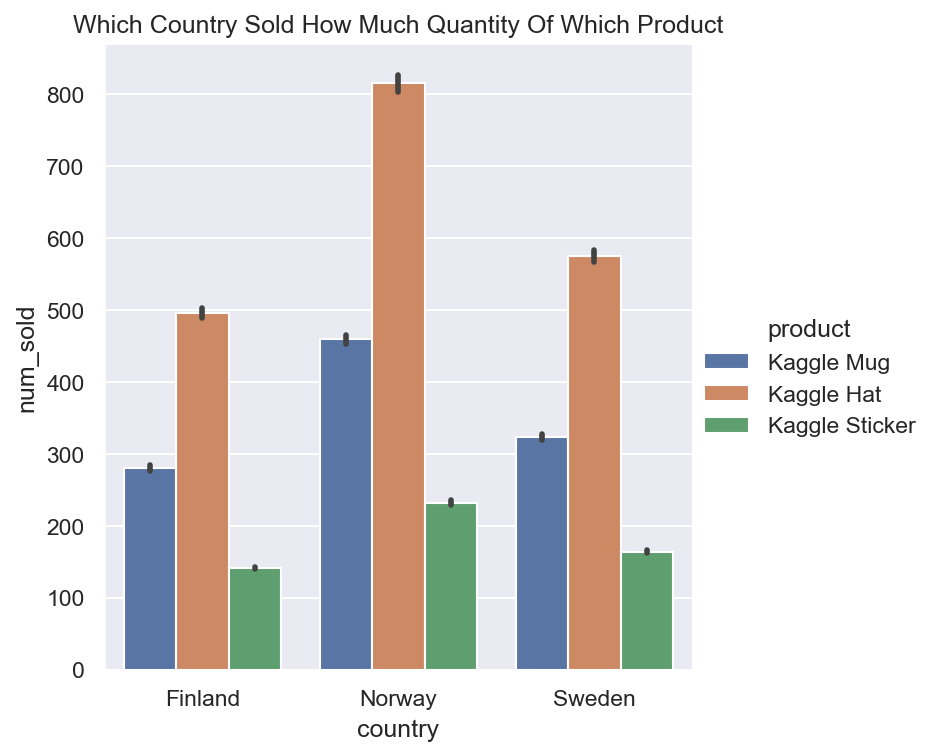

In [24]:
sns.catplot(data=df_train, x='country', y='num_sold', hue='product', kind='bar')
plt.title('Which Country Sold How Much Quantity Of Which Product')
plt.show()

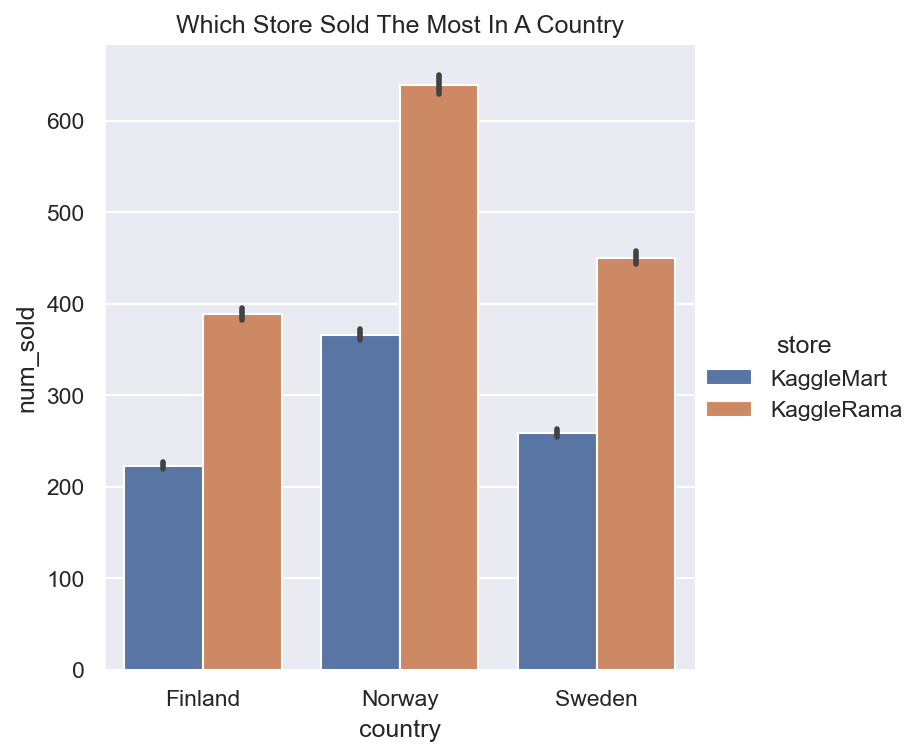

In [25]:
sns.catplot(data=df_train, x='country', y='num_sold', hue='store', kind='bar')
plt.title('Which Store Sold The Most In A Country')
plt.show()

## Encoding Categorical Variables

In this dataset, we have three columns who are acting as categories.
1. `country`
2. `product`
3. `store`

The `country` feature has three categories. Namely, *Finland*, *Norway* and *Sweden*.
The `product` feature has tbree categories. Namely, *Kaggle Mug*, *Kaggle Cup* and *Kaggle Sticker*.
The `store` feature has two categories. Namely, *KaggleMart* and *KaggleRama*.

In this section, we will encode all these features so that the machine learning model is able to understand these features.

In [26]:
df_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


### Ordinal Encoder

This particular ML problem requires us to predict the number of products sold given the particular date, country, store and product.
Hence, we can say that the `num_sold` feature is the target variable here.
All the other columns are the features here.

The target variable - `num_sold` is already an integer. Hence, we need not to encode it.
To encode target variables, we have `sklearn.preprocessing.LabelEncoder`

From the features column, we have *country*, *store* and *product* as categorical variables.
To encode feature variables, we have `sklearn.preprocessing.OrdinalEncoder`
We will now use the same to encode the feature variables. 

In [27]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

In [28]:
df_train['country'].value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [29]:
df_train['country'] = enc.fit_transform(df_train[['country']])

In [30]:
df_train['country'].value_counts()

0.0    8766
1.0    8766
2.0    8766
Name: country, dtype: int64

We can now see that the string values in the column are mapped to integers respectively.
1. *Finland* is mapped to *0.0*
2. *Norway* is mapped to *1.0*
3. *Sweden* is mapped to *2.0*

We can do the same for the remaining features.

In [31]:
df_train['product'].value_counts()

Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64

In [32]:
df_train['store'].value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

In [33]:
df_train['product'] = enc.fit_transform(df_train[['product']])
df_train['store'] = enc.fit_transform(df_train[['store']])

In [34]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,0.0,0.0,1.0,329
1,1,2015-01-01,0.0,0.0,0.0,520
2,2,2015-01-01,0.0,0.0,2.0,146
3,3,2015-01-01,0.0,1.0,1.0,572
4,4,2015-01-01,0.0,1.0,0.0,911


In [35]:
df_train['product'].value_counts()

1.0    8766
0.0    8766
2.0    8766
Name: product, dtype: int64

In [36]:
df_train['store'].value_counts()

0.0    13149
1.0    13149
Name: store, dtype: int64

### One-Hot Encoding 

Another way of encoding categorical data is to *OneHotEncode* them.
Above, we saw that `sklearn.preprocessing.OrdinalEncoder` encodes the data in such a way that everything stays in one column only and all the features as assigned a unique integer.
In OneHotEncoding, the only integer value that a feature can take is either 0 or 1.
Hence, if we have a column with 3 features i.e. *country* with values *Finland*, *Norway* and *Sweden* then `sklearn.preprocessing.OneHotEncoder` would encode them as :- 
- Where Sweden comes - *1 0 0*
- Where Norway comes - *0 1 0*
- Where Finland comes - *0 0 1*

We can see that this is a much more expressive way of encoding categorical variables. 
Although this can also lead to a messy and long dataframe when dealing with a lot of features with categorical variables.

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
  categories='auto',
  drop=None,
  sparse=True
)

In [78]:
oneHotdf = pd.read_csv('data/train.csv', parse_dates=['date'])

oneHotdf

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [79]:
country_onehot_encoded = ohe.fit_transform(oneHotdf[['country']])

In [80]:
country_onehot_encoded.toarray(), ohe.categories_

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]),
 [array(['Finland', 'Norway', 'Sweden'], dtype=object)])

In [81]:
# Adding the data back to dataframe
oneHotdf[ohe.categories_[0]] = country_onehot_encoded.toarray()

In [82]:
oneHotdf.head(10)

,row_id,date,country,store,product,num_sold,Finland,Norway,Sweden
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1.0,0.0,0.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1.0,0.0,0.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1.0,0.0,0.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1.0,0.0,0.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1.0,0.0,0.0
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283,1.0,0.0,0.0
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526,0.0,1.0,0.0
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906,0.0,1.0,0.0
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250,0.0,1.0,0.0
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005,0.0,1.0,0.0


In [83]:
# Doing the same to store column
store_onehot_encoded = ohe.fit_transform(oneHotdf[['store']])

oneHotdf[ohe.categories_[0]] = store_onehot_encoded.toarray()

In [84]:
oneHotdf.head(10)

,row_id,date,country,store,product,num_sold,Finland,Norway,Sweden,KaggleMart,KaggleRama
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1.0,0.0,0.0,1.0,0.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1.0,0.0,0.0,1.0,0.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1.0,0.0,0.0,1.0,0.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1.0,0.0,0.0,0.0,1.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1.0,0.0,0.0,0.0,1.0
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283,1.0,0.0,0.0,0.0,1.0
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526,0.0,1.0,0.0,1.0,0.0
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906,0.0,1.0,0.0,1.0,0.0
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250,0.0,1.0,0.0,1.0,0.0
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005,0.0,1.0,0.0,0.0,1.0


In [85]:
# Finally, for the product column
product_onehot_encoded = ohe.fit_transform(oneHotdf[['product']])

oneHotdf[ohe.categories_[0]] = product_onehot_encoded.toarray()

In [86]:
oneHotdf.head(10)

,row_id,date,country,store,product,num_sold,Finland,Norway,Sweden,KaggleMart,KaggleRama,Kaggle Hat,Kaggle Mug,Kaggle Sticker
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [87]:
# Dropping text columns
oneHotdf.drop(['country', 'store', 'product'], axis=1, inplace=True)

In [88]:
oneHotdf.head(10).T

,0,1,2,3,4,5,6,7,8,9
row_id,0,1,2,3,4,5,6,7,8,9
date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
num_sold,329,520,146,572,911,283,526,906,250,1005
Finland,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Norway,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Sweden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KaggleMart,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
KaggleRama,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
Kaggle Hat,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Kaggle Mug,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Later, we will also compare which dataframe yeilds better results when processed by a machine learning model.

## Encoding Date Values
Since machine learning model will only accept integers as input, we also need to separate the individual date values.

Since we have parsed the *date* column as a `datetime` object in pandas, we can directly call `pandas.Series.dt` and access any property like *year*, *month*, *day*, *day of the week*, etc.

In [70]:
df_train['date'].dt.year.value_counts()

2016    6588
2015    6570
2017    6570
2018    6570
Name: date, dtype: int64

In [73]:
# making a function because these encoding will have to be applied to oneHotEncoded dataframe and ordinalEncoded dataframe

def encode_dates(df_tmp: pd.DataFrame) -> pd.DataFrame:
  df_tmp['saleYear'] = df_tmp['date'].dt.year
  df_tmp['saleMonth'] = df_tmp['date'].dt.month
  df_tmp['saleDay'] = df_tmp['date'].dt.day
  df_tmp['saleDayOfWeek'] = df_tmp['date'].dt.dayofweek
  df_tmp['saleDayOfYear'] = df_tmp['date'].dt.dayofyear

  df_tmp.drop('date', axis=1, inplace=True)

  return df_tmp


In [74]:
df_train = encode_dates(df_tmp=df_train)

df_train.head().T

,0,1,2,3,4
row_id,0.0,1.0,2.0,3.0,4.0
country,0.0,0.0,0.0,0.0,0.0
store,0.0,0.0,0.0,1.0,1.0
product,1.0,0.0,2.0,1.0,0.0
num_sold,329.0,520.0,146.0,572.0,911.0
saleYear,2015.0,2015.0,2015.0,2015.0,2015.0
saleMonth,1.0,1.0,1.0,1.0,1.0
saleDay,1.0,1.0,1.0,1.0,1.0
saleDayOfWeek,3.0,3.0,3.0,3.0,3.0
saleDayOfYear,1.0,1.0,1.0,1.0,1.0


In [89]:
oneHotdf = encode_dates(df_tmp=oneHotdf)

oneHotdf.head().T

,0,1,2,3,4
row_id,0.0,1.0,2.0,3.0,4.0
num_sold,329.0,520.0,146.0,572.0,911.0
Finland,1.0,1.0,1.0,1.0,1.0
Norway,0.0,0.0,0.0,0.0,0.0
Sweden,0.0,0.0,0.0,0.0,0.0
KaggleMart,1.0,1.0,1.0,0.0,0.0
KaggleRama,0.0,0.0,0.0,1.0,1.0
Kaggle Hat,0.0,1.0,0.0,0.0,1.0
Kaggle Mug,1.0,0.0,0.0,1.0,0.0
Kaggle Sticker,0.0,0.0,1.0,0.0,0.0


We can now see that the *date* column has been separated to individual integers.

We can now say that our dataframe is ready to be processed by a machine learning model.